# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [18]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display  # Allows the use of display() for DataFrames

# Added by me
import matplotlib.pyplot as plt

# Show matplotlib plots inline (nicely formatted in the notebook)
% matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis=1, inplace=True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [19]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [20]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [200,401,1]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3067,13240,23127,3941,9959,731
1,27167,2801,2128,13223,92,1902
2,7057,9810,9568,1762,3293,1776


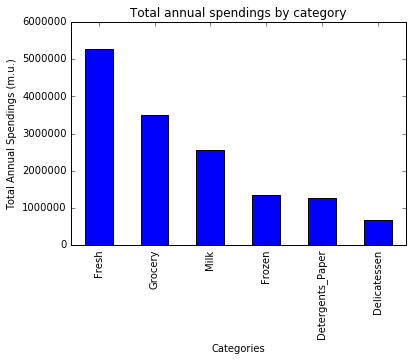

In [21]:
## display the sum of annual spending for all customers by category 
total_annual_sales = pd.DataFrame(data.sum(), columns = ['Total_Annual_Spendings'])

my_plot = total_annual_sales.sort(columns='Total_Annual_Spendings', ascending=False).plot(kind='bar',legend=None,title="Total annual spendings by category")

my_plot.set_xlabel("Categories")
my_plot.set_ylabel("Total Annual Spendings (m.u.)")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1127cbc50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113a0d790>]], dtype=object)

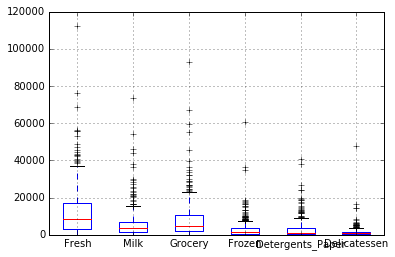

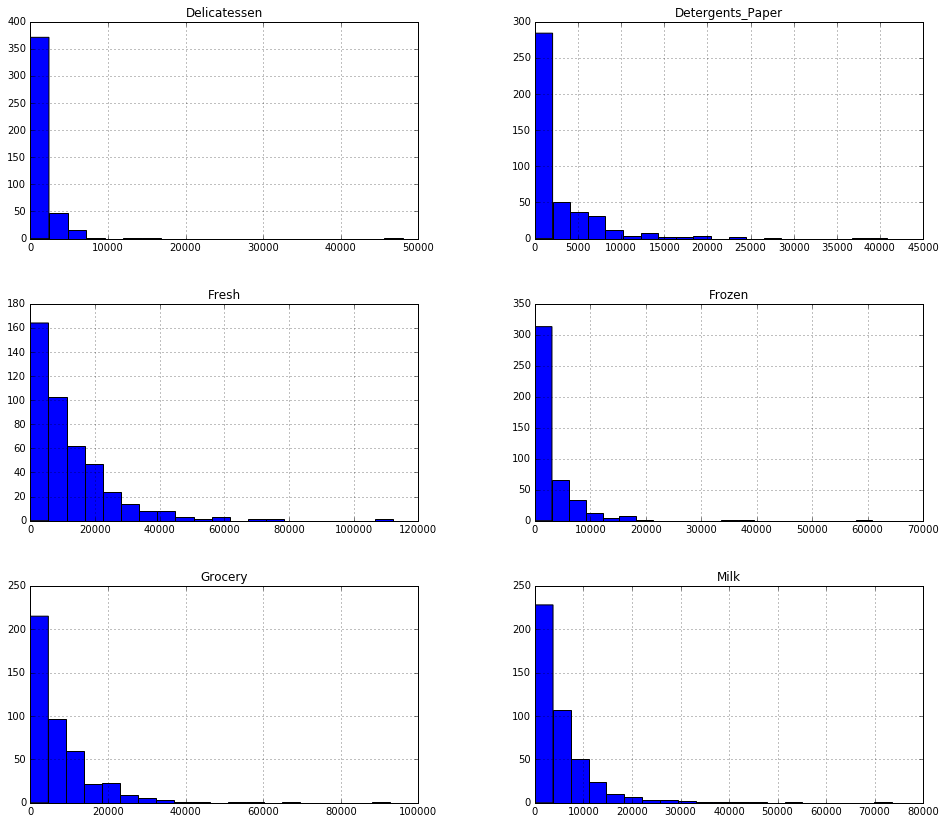

In [22]:
data.boxplot()
data.hist(bins=20, figsize=(16, 14))

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** Looking at the first sample customer, we notice that this customer has three major buying preference that is Groceries, Milk, and Detergents and papers. Starting from the last one, the dataset statistics says that, the average annual spending, among all the costumers, is roughly 2881 in monetary units (m.u.), and the total purchase cost by this costumer was 9959 m.u. Additionally, if we look at the Detergents_Paper quartile range, we can easily see that this amount spent falls into the range between the fourth quartile (3922 m.u.) and max value (40827 m.u.), which means that this customer is one of the top 25% buyers. This fact can also be seen by looking at the Detergents_Paper median value (816.5), which also tell us that the majority of data points lie to the left of the mean. Similarly, the same reasoning can be applied to Milk, Grocery and Frozen categories, in each case, the total annual spent (13240 m.u., 23127 m.u. and 3941 m.u. respectively) are top 25% annual spent values. On the other hand, when it comes to the Fresh products category, the total amount spent (3067 m.u.) is much less than the mean (12000 m.u.) and falls between the minimum and first quartile range value. Given these preferences, I would argues that this customer could be a small wholesale distributor or even a restaurant/cafeteria because of the higher purchases on Milk and Groceries mainly. 

However, if we look at the second sample, we first notice that this customer has its major spending on the Fresh category. In fact, this costumer annual spending on Fresh products was 27167 m.u. which is much greater than the mean and median (12000, 8504) respectively, which puts it among the top buyers of Fresh products because since the median is less than the mean, the majority of customers lie to the left of the mean, thus most of the costumers spend less than the mean when it comes to Fresh Products. We can see a similar pattern on Frozen and Delicatessen products with annual spending of 13223 m.u. and 1902 m.u, both lies inside the fourth quartile range. Based on the data, this customer has very different buying patterns when compared to the rest, mainly because it is one of the top Delicatessen consumers, which can be seen on the graph, as the least wanted product. My guess is that this could be a store that sells cuts, like a store that sells cheeses since its major spending are Frozen, Groceries, and Delicatessen products and the spending on Detergents_Paper is very low.

As for the third customer, I believe it could be a cafeteria or even a bakery since by looking at the numbers we can see that it spends most of its budget on Milk (top 25% buyer) and Delicatessen while as for the other categories, most of the spending lies close to the mean or to the median. 

It is important to notice that by looking at the charts above, we can spot some data points that looks like outliers and consequently, could interfere in most of the statistics shown previously.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [23]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score

# setting random states to make the results reproducible
random_state = 256

for column_name in data:
    #TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(column_name, axis = 1, inplace = False)
    target = data[column_name]
 
    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, target, random_state=random_state, test_size=.25)
 
    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=random_state)
    regressor.fit(X_train, y_train)
    
    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print "Predicting score for: ", column_name, ": ", score

Predicting score for:  Fresh :  -0.516967573453
Predicting score for:  Milk :  0.707169579679
Predicting score for:  Grocery :  0.680933133228
Predicting score for:  Frozen :  -0.879242760099
Predicting score for:  Detergents_Paper :  0.74699689047
Predicting score for:  Delicatessen :  -0.111549919624


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** My first attempt was to try to predict the Delicatessen feature and the R^2 score was -0.11. Since, as stated in the question, the line predicted by the DecisionTreeRegressor using the 5 remaining features failed to predict the Delicatessen feature (negative score of -0.11), to me, it indicates that this feature is necessary for customers’ spending prediction because the data in it cannot be inferred from the data on the other features, thus this feature has important/unique information to add. On the other hand, by analyzing each possible combination, we can see that parts of some features can be derived from the others with fairly reasonable scores as it is the case with Detergents_Paper and Milk features with predicting scores of 0.746 and 0.707 respectively. Consequently, these 2 features might not be necessary for identifying customers’ spending behavior because they do not add much more information to the model, since part of the knowledge in it can be derived from other features, and keeping them on the dataset, might raise problems related with the curse of dimensionality. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

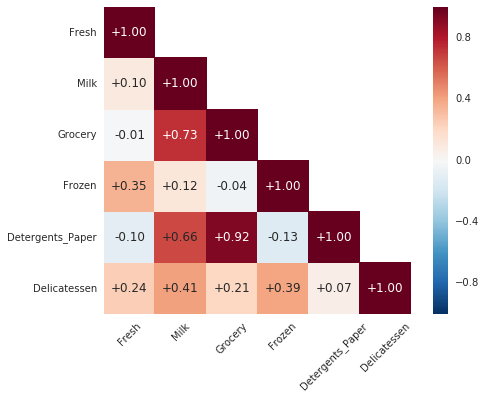

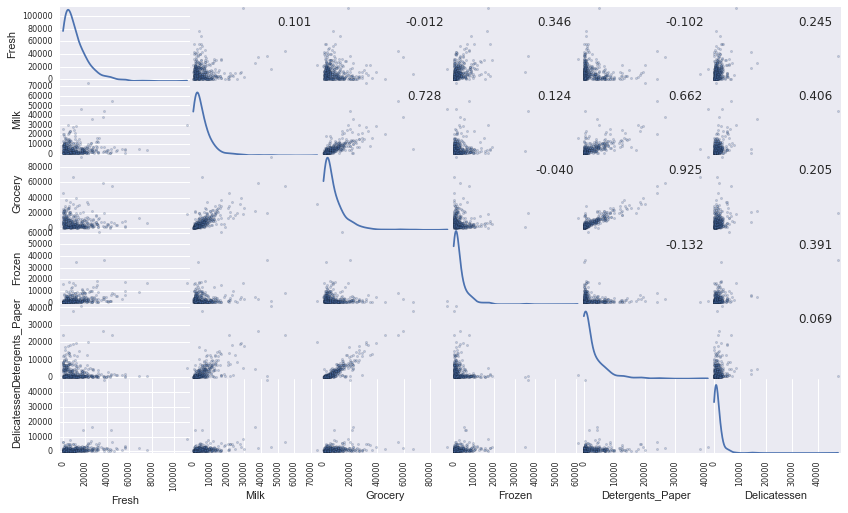

In [43]:
# Show the features correlation is a heat-map
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu_r', fmt='+.2f')
    plt.xticks(rotation=45, ha='center');

# Produce a scatter matrix for each pair of features in the data
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# get and display the correlation coefficients
corr = data.corr().as_matrix()

for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** As we can see by looking at the scatter matrix and by looking at the corresponding correlation coefficients, there are some variables that exhibit some degrees of correlations with each other, some very strong some not. The correlation coefficients show that the pair of features that has the most degree of correlation is the pair Detergents_paper/Grocery with a correlation of 0.925. There are more two pairs of features that present a relatively higher value of correlation, they are Grocery/Milk, and Detergents_Paper/Milk with correlations of 0.728 and 0.662 respectively. The scatter matrix also shows that the insights developed on the previous question regarding the issue of whether or not a given feature is relevant based upon the fact that it could or not be determined by the other features, confirm that the Delicatessen feature is relevant to predicting customers purchasing habits because it does not show any high level of correlation with any other feature that would justify its removal. For the distribution of these features, most of them are non-normal distributions with skew to the right, that meaning that the mean is often greater than the median which is greater than the mode and in all of the cases, the majority of the data points lie to the left of the mean.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

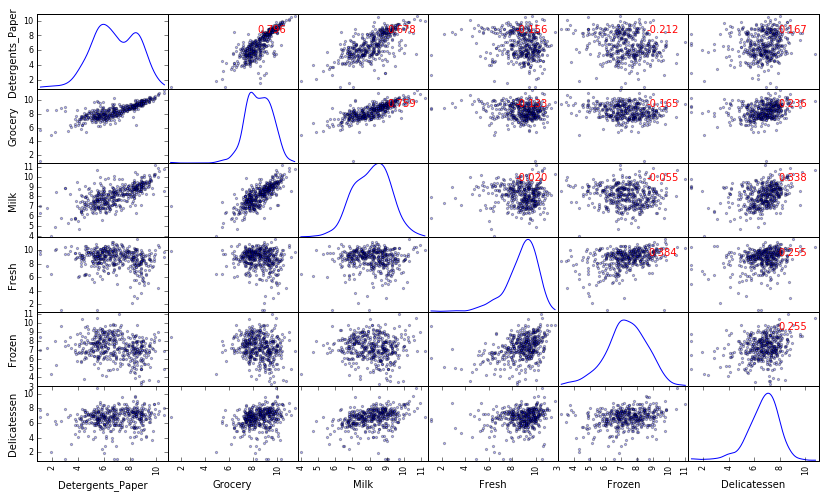

In [25]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
# resort the features to display the more highly correlated features first
idx_reorder = ['Detergents_Paper', 'Grocery', 'Milk', 'Fresh', 'Frozen', 'Delicatessen']
axes = pd.scatter_matrix(log_data[idx_reorder], alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = log_data[idx_reorder].corr().as_matrix()

for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center', color="red")

plt.show()

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [26]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
1,10.209758,7.937732,7.662938,9.489713,4.521789,7.550661
2,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [27]:
detected_outliers =  [0] * 440

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():

    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    IQR = Q3 - Q1
    step = 1.5 * IQR
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    
    outliers = ~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))

    # count how many times a point is marked as 
    detected_outliers = detected_outliers + outliers
    
    display(log_data[outliers])
    
# OPTIONAL: Select the indices for data points you wish to remove
repeated_outliers = detected_outliers[detected_outliers > 1].index
outliers = detected_outliers[detected_outliers == 1].index

# multiple category outliers
print "Data points (customers) considered outliers for more than one feature:"
print repeated_outliers

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Data points (customers) considered outliers for more than one feature:
Int64Index([65, 66, 75, 128, 154], dtype='int64')


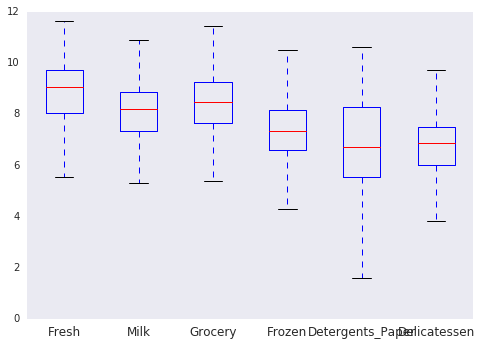

In [41]:
log_data.boxplot(column=list(data.columns), grid=False, return_type='axes');

### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Yes, there are some data points that appear as outliers in more than one category such as the customer’s indexes 65, 66, 75, 128, and 154. From my perspective, these data points (the ones that repeat in more than one category) should not be removed from the dataset because I believe that because they have "extreme" values in more than one category, it makes the probability of being noisy points actually smaller. In other words, if we treat noise as human or even sensor error, I believe that the probability of this problem happen in more than one category at the same time is less than if it was just in one category, thus I believe they make a good case for a valid point that just goes out of the common pattern. Take the customer index 154 as an example, it appears as outlier in Grocery, Milk, and Delicatessen, therefore, it does not seem to me as an outlier (in the sense of error) it could perfectly be a big supper market or retailer that just buys more than the usual. As for the outliers list, I decided that all the points (except the ones in more than one category that I talked above) should be removed from the dataset simply because by looking at the features closely, we can see that there are a lot of points that fall outside the pattern, and once we are able to spot these points, I strongly believe they should be removed, otherwise there would be no benefit in doing so. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

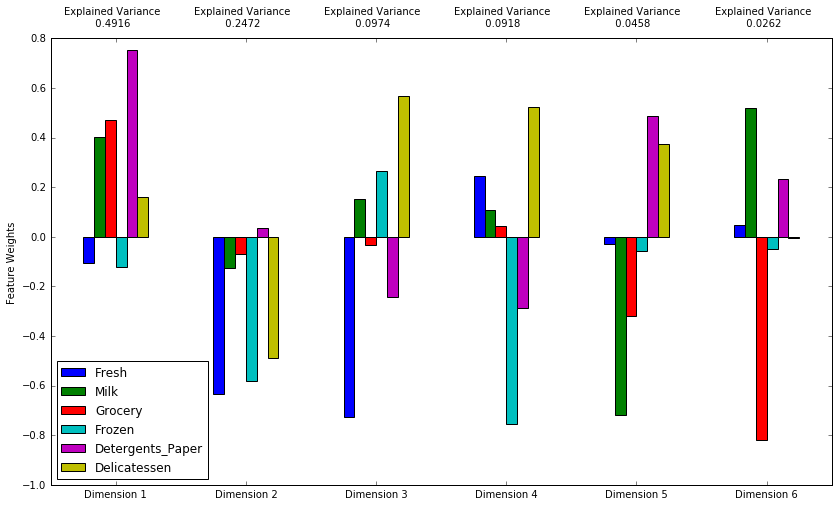

In [28]:
from sklearn.decomposition import PCA

# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Apply a PCA transformation the sample log-data
pca_samples = pca.transform(log_samples)

# print pca.components_

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** In total, the first two principal components explain (0.4916 + 0.2472) equal to 0.7388 of the variance of the data. The first four principal components on the other hand, explain (0.4916 + 0.2472 + 0.0974 + 0.0918) which is equal to 0.928 of the variance. As we know, each PC is composed of little bits and pieces from potentially all the features. Having said that, the first PC seems to indicate that, in terms of customer spending, the Milk, Grocery, Detergents_Paper and Delicatessen are the four features that most represent the trending (customer spending) in this dataset where Detergets_paper is the feature that has most of its data captured (a nearly 0.8 positive weight). On the other hand, the Fresh and Frozen features do not play an important role to describe the customer spending pattern represented by this PC. In other words, the four features with positive weights, are the ones that have most variance - retains the maximum amount of information - when it comes to customer spending habits. Because PCA tries to come up with characteristics that best describe the trend in the data independently, that is, properties that show as much variance across customer spending as possible, the second component indicates that Detergents_paper is the feature with the maximum variance captured, while each one of the others five (Fresh, Milk, Grocery, Frozen, and Delicatessen) did not have most of their variance projected onto the PC, in particular the Fresh feature with a negative weight above 0.6. Following the same reasoning, the third dimension is governed by the mix of Milk, Frozen and mostly Delicatessen - with roughly 0.6 positive weight, while the three remaining features (Fresh, Grocery and Detergents_Paper) did not have much of the variance capture by third PC, especially the Frozen category which shows a very large negative weight. Finally, the fourth dimension is the mix of Fresh, Milk, Grocery and Delicatessen features, where the last one represents most of the data captured by this PC with almost 0.6 positive weight whilst the Frozen and Detergents_paper are the ones that did not have mostly of their variance captured; therefore the fourth dimension indicates that the mixture of these four features is the fourth action that drives customer spending on this dataset.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [29]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,3.1142,-0.0816,0.3314,-1.4398,-0.4164,-0.1523
1,-2.3735,-2.4368,0.5839,-0.2504,-0.6077,-0.0529
2,1.9019,-0.5158,0.2656,0.0823,-0.1054,0.2327


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [30]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data) # Apply the dimensionality reduction on good_data.

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [31]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,3.1142,-0.0816
1,-2.3735,-2.4368
2,1.9019,-0.5158


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** First of, the k-means algorithm is a very popular general purposed algorithm for clustering data that is being used in many applications. Some of the advantages of this algorithm includes, only one important parameter to tune (k - the number of expected clusters to be found), K-means scales very well to a large number of samples, and although it might converge to a local minimum, the k-means algorithm will always converge, given time. On the other hand, some of the disadvantages of k-means is the fact that it works with a hard boundary - this way for any given point, it will always be part of one cluster even if it does not look like to belong there. Additionally, the criteria used by k-means to find the clusters make some assumptions that might weaken the algorithm. Firstly, key means try to find clusters in data by minimizing the within-cluster sum of squares, and by doing so, this criterion assumes that the data is always convex and isotopic and this, it might generate unexpected clusters if these assumptions are not present. If you take a look at the figure bellow, we see some unexpected clusters made by k-means mainly because the assumption are not true in these cases. 

![caption](http://scikit-learn.org/stable/_images/plot_kmeans_assumptions_001.png)

The top right image shows an output where k-means identified two clusters while clearly we can see that there are three of them. That might happen if the number incorrect number of clusters is passed as input. The top left image shows that k-means tends to perform poorly with allocated (non-isotropic data blob). Also, the bottom right one emphasizes that because k-means tries to cluster data with equal variance, if the data has unequal variance, it also tends to perform poorly, and the bottom left image shows that although visually the clusters are well identified, k-means generally has problems to spot clusters with unevenly sizes.     

The Gaussian Mixture Model algorithm has some differences when compared to k-means that might be good depending upon the data we have. Some of the advantages of this approach is the fact that it uses Bayes probability theorem to come up with the clusters it produces. Basically it uses the Expectation-Maximization algorithm to compute, for each point, a probability of being generated by each component of the model. Some other advantages include the fact that it works with many probability distributions - not only Gaussians - and at any given time step, it never gets worse - although it might not always converge because since EM works with probabilities, there are an infinite number of configurations, and finally, it allows for a soft clustering - the capability of specifying that a given point could be from more than one cluster.


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [32]:
from sklearn import mixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for cluster_size in range(2,7,1):  
    clusterer = KMeans(n_clusters=cluster_size, random_state=random_state).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    centers = clusterer.cluster_centers_ 
    sample_preds = clusterer.predict(pca_samples)
    score = silhouette_score(reduced_data, preds)
    print "K-means silhouette score with ", cluster_size, " clusters: ", score

for cluster_size in range(2,7,1):  
    clusterer = mixture.GMM(n_components=cluster_size).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    centers = clusterer.means_
    sample_preds = clusterer.predict(pca_samples)
    score = silhouette_score(reduced_data, preds)
    print "GMM silhouette score with ", cluster_size, " clusters: ", score
    
    
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=random_state).fit(reduced_data)
#clusterer = mixture.GMM(n_components=2).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_ 
#centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

K-means silhouette score with  2  clusters:  0.437737809478
K-means silhouette score with  3  clusters:  0.341100254676
K-means silhouette score with  4  clusters:  0.329962914052
K-means silhouette score with  5  clusters:  0.347892843985
K-means silhouette score with  6  clusters:  0.350191891183
GMM silhouette score with  2  clusters:  0.418703821796
GMM silhouette score with  3  clusters:  0.426302706573
GMM silhouette score with  4  clusters:  0.325386453905
GMM silhouette score with  5  clusters:  0.276187108928
GMM silhouette score with  6  clusters:  0.276914891614


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** For this task, since I was not yet sure about which clustering algorithm would be better, I chose to implement both algorithms. Using a range of 2 to 6 clusters (5 in total), I calculated the silhouette score for each configuration. For the k-means algorithm, the list of scores are: 0.43, 0.34, 0.32, 0.34, 0.35 for clusters sizes ranging from 2 to 6, and for the (Gaussian Mixture Model) GMM algorithm the list goes as 0.41, 0.42, 0.32, 0.27, 0.27. It is clear, in both cases, that for a model configuration using two clusters, the silhouette score is closest to its best which makes total sense since we reduced the dimensionality of the data using PCA from six to only two dimensions. Also, the silhouette score using the K-means algorithm with two clusters is a little higher than the GMM's silhouette score with also two clusters. Indeed, it is worth noting that the GMM algorithm reported a slightly better silhouette score for three clusters centers over two which does not make much sense since the data was scale to have two features.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

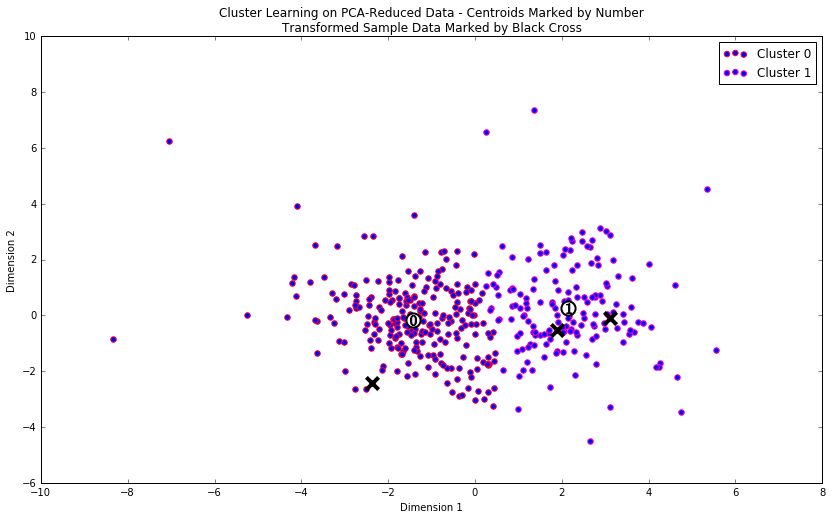

In [33]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [34]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers) #Transform data back to its original space

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments

display(true_centers)

display(np.exp(good_data).describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9432,1927,2308,2161,299,753
Segment 1,4921,7625,11871,1084,4394,1078


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,12329.143921,5498.970223,7553.749380,3003.228288,2762.955335,1442.712159
std,12539.680889,6432.024140,9418.621876,3701.451106,4742.661573,1740.147634
min,9.000000,55.000000,3.000000,36.000000,3.000000,3.000000
25%,3940.000000,1548.500000,2118.000000,824.000000,260.000000,445.500000
50%,8885.000000,3610.000000,4563.000000,1718.000000,788.000000,993.000000
75%,16958.000000,6878.000000,9739.500000,3738.000000,3647.000000,1825.500000
max,112151.000000,54259.000000,92780.000000,35009.000000,40827.000000,16523.000000


           Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0   54.5  31.2     27.6    59.3              28.4          42.8
Segment 1   33.5  77.6     79.2    38.7              78.1          55.0


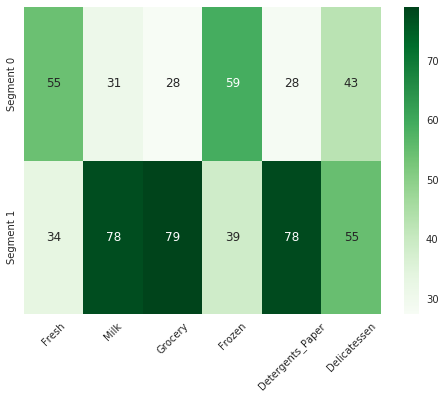

In [39]:
import seaborn as sns

# add the true centers as rows to our original data
newdata_with_centers = data.append(true_centers)

# show the percentiles of the centers
ctr_pcts = 100. * np.round(newdata_with_centers.rank(axis=0, pct=True).loc[['Segment 0', 'Segment 1']],3)
print ctr_pcts

# visualize percentiles with heatmap
_ = sns.heatmap(ctr_pcts, annot=True, cmap='Greens')
plt.xticks(rotation=45, ha='center');

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** Clearly there is a separation between the purchasing habits of these two segments. While the Segment 0 has customers that spend much more of their budgets in Fresh and Frozen products, the customers in the Segment 1 buy much more Delicatessen, Detergents_Papers, Grocery and Milk products. Therefore, the customers identified as belonging to the Cluster 0 are much more likely to be part of a set of establishments that sell goods including fresh vegetables and/or a large variety of fresh meets (butcher shops) - a retailer. On the other hand, the customers categorized to be in Cluster 1 seems to be establishments like big supermarkets/stores or even small wholesale distributors because of the higher purchase levels of Grocery and Detergents_Paper, but it could also have places that sells goods like cafeteria and bakeries because of the high values of Delicatessen and Milk products. I am afraid that looking at the statistics shown at the beginning of this document would not be a clear and concise analysis because since we removed some outliers from the dataset, most (I should say all) of the properties e.g. mean, std, min etc. have changed. Because of that, it is worth seeing the statistics of the dataset without the outliers. By looking at this new statistics, we can see that, because these two points represents sort of the average customer within each cluster, most of the products e.g. Cluster 0: Fresh and Frozen, that the customers inside the clusters are specialized in buying follow inside the 25% - 75% quartile range.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [35]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:** Back in question 1, the first customer point was predicted to be a `wholesale distributor or even a restaurant/cafeteria` and we can see that this customer was predicted to be part of the Cluster 1 which in Question 8 was categorized to represent the feature set of `big supermarkets or even small wholesale distributors but it could also have places that sells goods like cafeteria and bakeries`. By analyzing the sample 0 features Groceries, Milk, and Detergents, we can notice that the value for each one of these features is above the respectively means of 7553.7, 6432.0 and 2762.9 and by looking at the heat-map above, we can see that these values comply with the cluster 1 centre for each of these categories which makes this sample point much more suitable to be in segment 1 than in segment 0. The customer point 2 was earlier predicted to be a `store that sells cuts, like a store that sells cheeses since its major spending are Frozen, Groceries` and the model just predicted it to belong to the cluster 0 which is a cluster that is likely to represent a set of `establishments that sell goods including fresh vegetables and/or a large variety of fresh meets (butcher shops) - a retailer`. In addition the spending pattern presented by this sample 1, matches very close to the ones in reported for cluster 0. For instance, in features such as Fresh, Detergents_Paper, and Frozen, all the values approximates to the centres on segment 0 with Fresh and Frozen being above the mean and Detergents_Paper below it. Finally, the third customer point was intuitively predicted to be a `cafeteria or even a bakery` and the model predicted it to be in cluster 1 which could also be cafeteria or bakeries since its spending are mostly on Milk and Delicatessen which best mimics the centres in the segment 1. In conclusion, the model could perfectly capture the previous insights we made about the sample data points by categorizing each one of them into clusters that consistent represent that customer purchasing habits.  

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:** Clearly, a change like that to the delivery service would affect a lot of customers, however, not all of them would be affected for such change and even among the ones impacted by the modification, they would not be affected equally. I can imagine that there are customers, especially the small ones that do not need to upgrade their stocks every day just because they do not have the selling power to sell the whole stock in only one day, but depending on their schedule, even these customers would also be affected by the change in the distribution service. 
It seems to me that the best way to conduct this test would be to include all kinds of customers present in the dataset because that way these tests could cover the most existent possibilities, in other words, the tests would evaluate the effects of the changes on all kinds of customers, thus minimizing the risks of drawing wrong conclusions. In that sense, the structure of the data, especially the clusters formed previously, could help because it shows that all the customers in the dataset can be classified as two segments, and these segments drives the purchasing patterns of these customers, so if we include customers from both segments/clusters we would be covering all the types of customers present in the dataset, and more importantly, those would be the kinds that drive the purchasing habits. 

### Question 11
*Assume the wholesale distributor wanted to predict some other feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*

**Answer:** In order to predict a new feature such as whether or not a new customer would be affected by the change in the distribution service, the wholesale distributor could use the same dataset with the six features used so far, along with the results of the unsupervised implementation. With this data, a binary supervised learner could be developed and trained with the six known features plus the newly clustering label feature (CHANNEL) that we just got from our unsupervised learning techniques targeting weather or not a specific customer would be affected by the changes in the products distribution frequency (from 5 to 3 days) - data that we just got from the A/B testing. With that learner, we could, given new unseen data points (customers) discover if these customers would be affected by this modification in the distribution service. In fact, this supervised learner could also serve as a second testing tool because we could feed it with all the remaining customers that did not participate in the A/B testing in order to figure out how they would react to the changes, and of course it would enhance the output from the A/B testing and thus provide a better picture for the decision making. Of course, for doing that with new data points, we should know which cluster this new customer would be assigned but for that, we just have to run the clustering algorithm we just implemented and we would get this label. In conclusion, this scenario shows how unsupervised learning can be used as a pre-process for a supervised learning approach.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

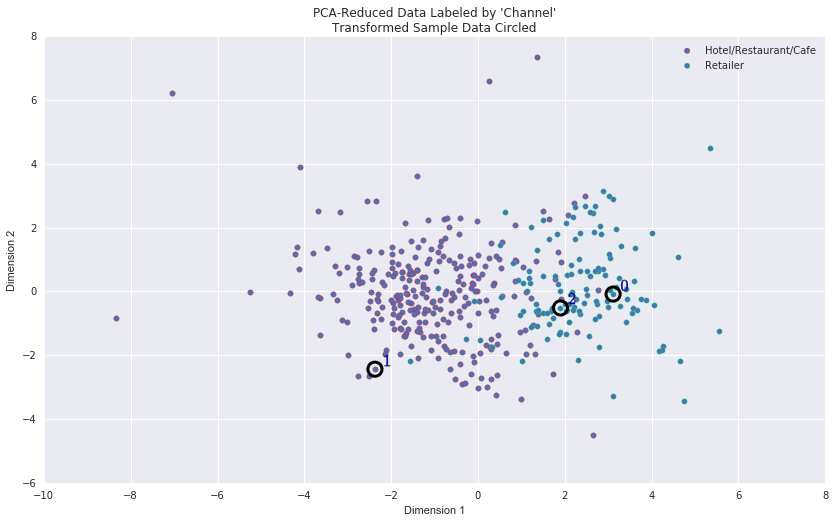

In [40]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** First of the comparing the two distributions, it is clearn that the number of clusters is the same for both i.e. 2 clusters. When it comes to the clustering algorithm, it is clear to me that this is not a K-means implementation because the way K-means works is by placing (in this case) 2 cluster centers in the middle of each possible cluster and these centroids divide the data by creating a line between them (minimizing some criterion). It is clear in that implementation though that there is no line dividing the data as can be seen in the example figure bellow where there are clear lines dividing the data.

![caption](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/K_Means_Example_Step_4.svg/197px-K_Means_Example_Step_4.svg.png)

Regarding the classification described here compared with the previous insights developed, there is a strong similarity in the segments described here and the ones we come up with after analyses, and I do believe that there are customers that could be classified as retailers or as Hotels/Restaurants/Cafes although for some points it is not clear what they actually are because from my point of view, there could be more than one possibility. Therefore, I consider this classification as consistent as the ones developed during the analysis.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.